In [1]:
import pandas as pd
import numpy as np

In [2]:
d4=pd.read_csv('p4_features.csv')

In [3]:
d4.head()

,ID,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,...,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro,z_arg_diff_fft_Gyro,label_of_activity
0,0,2.823040,-8.492207,-0.911347,-0.009322,-0.791606,0.314723,-0.007329,0.007163,0.011193,...,5,4,3,5,4,5,5,4,13,walking
1,1,2.822355,-8.499940,-0.940295,-0.012993,-0.832273,0.313211,-0.004189,-0.012090,0.015014,...,5,4,5,5,4,5,5,5,17,walking
2,2,2.827205,-8.504986,-0.927076,0.008198,-0.841518,0.314374,0.004222,-0.028786,0.008447,...,7,4,5,15,4,5,5,5,3,walking
3,3,2.798493,-8.490097,-0.923427,-0.015275,-0.831738,0.313562,-0.009441,-0.021082,0.015159,...,7,4,7,5,4,5,15,5,3,walking
4,4,2.810281,-8.459816,-0.914745,0.020359,-0.785661,0.302926,0.004862,-0.032658,0.010452,...,5,6,5,5,4,5,5,6,3,walking


In [4]:
d4.shape

(2095, 338)

In [5]:
d4.drop(["ID"],axis=1,inplace=True)

In [6]:
d4['label_of_activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs'], dtype=object)

In [7]:
d4.replace('walking',0,inplace=True)
d4.replace('standing',1,inplace=True)
d4.replace('jogging',2,inplace=True)
d4.replace('sitting',3,inplace=True)
d4.replace('biking',4,inplace=True)
d4.replace('upstairs',5,inplace=True)
d4.replace('downstairs',6,inplace=True)

In [8]:
d4.head()

,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,x_std_Acc,...,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro,z_arg_diff_fft_Gyro,label_of_activity
0,2.823040,-8.492207,-0.911347,-0.009322,-0.791606,0.314723,-0.007329,0.007163,0.011193,1.124976,...,5,4,3,5,4,5,5,4,13,0
1,2.822355,-8.499940,-0.940295,-0.012993,-0.832273,0.313211,-0.004189,-0.012090,0.015014,1.158061,...,5,4,5,5,4,5,5,5,17,0
2,2.827205,-8.504986,-0.927076,0.008198,-0.841518,0.314374,0.004222,-0.028786,0.008447,1.128835,...,7,4,5,15,4,5,5,5,3,0
3,2.798493,-8.490097,-0.923427,-0.015275,-0.831738,0.313562,-0.009441,-0.021082,0.015159,1.154060,...,7,4,7,5,4,5,15,5,3,0
4,2.810281,-8.459816,-0.914745,0.020359,-0.785661,0.302926,0.004862,-0.032658,0.010452,1.169809,...,5,6,5,5,4,5,5,6,3,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = d4.iloc[:,0:335]
y = d4['label_of_activity']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3) 

In [12]:
scaler = MinMaxScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

<ipython-input-12-3d0b614e0c44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-12-3d0b614e0c44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [13]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [14]:
X_train.head()

,x_mean_Acc,y_mean_Acc,z_mean_Acc,x_mean_Lin,y_mean_Lin,z_mean_Lin,x_mean_Gyro,y_mean_Gyro,z_mean_Gyro,x_std_Acc,...,y_argmin_fft_Gyro,z_argmin_fft_Gyro,x_arg_diff_fft_Acc,y_arg_diff_fft_Acc,z_arg_diff_fft_Acc,x_arg_diff_fft_Lin,y_arg_diff_fft_Lin,z_arg_diff_fft_Lin,x_arg_diff_fft_Gyro,y_arg_diff_fft_Gyro
1378,0.797126,0.557868,0.170050,0.139242,0.669976,0.469518,0.675467,0.492068,0.669879,0.073332,...,0.481481,0.481481,0.384615,0.538462,0.500000,0.423077,0.500000,0.423077,0.500000,0.500000
484,0.318283,0.122314,0.893916,0.231166,0.661231,0.490037,0.546923,0.506671,0.710382,0.006514,...,0.370370,0.481481,0.076923,0.346154,0.538462,0.461538,0.461538,0.500000,0.461538,0.384615
881,0.290153,0.190396,0.872963,0.230278,0.568340,0.468897,0.562940,0.499932,0.643375,0.838898,...,0.481481,0.481481,0.500000,0.269231,0.269231,0.500000,0.269231,0.000000,0.269231,0.500000
6,0.351435,0.017071,0.902670,0.260987,0.484833,0.584162,0.534331,0.504224,0.712525,0.242666,...,0.518519,0.555556,0.153846,0.115385,0.076923,0.153846,0.115385,0.153846,0.153846,0.192308
949,0.680307,0.985812,0.005435,0.178718,0.744724,0.453257,0.547823,0.507953,0.707190,0.000246,...,0.444444,0.555556,0.538462,0.038462,0.153846,0.923077,0.115385,0.115385,0.538462,0.423077


In [15]:
y_train.head()

1378    4
484     1
881     2
6       0
949     3
Name: label_of_activity, dtype: int64

In [16]:
#X = d1.loc[:,0:335]
#y = d1[]
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#y=label_encoder.fit_transform(y)

In [17]:
# import necessary library
from sklearn.feature_selection import VarianceThreshold

# we're setting variance threshold at 0
var_thres=VarianceThreshold(threshold=0)

# fitting this variance threshold in all columns of Newly Created  training data
var_thres.fit(X_train)

# get the number of constant columns (whoose variance is 0)
constant_columns = [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
print(len(constant_columns))

# dropping constant columns
X_train.drop(constant_columns, axis=1, inplace=True)

0


In [18]:
# function to get all features highly correlated (both positive and negative) with another for a given threshold
def correlation(dataset, threshold):
    col_corr = set()  #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr                        

corr_features = correlation(X_train, 0.95)
len(corr_features)

164

In [19]:
# dropping highly correlated features
X_train.drop(corr_features, axis=1, inplace=True)

In [20]:
X_train.shape

(1466, 171)

In [21]:
## Importing Libraries
from sklearn.feature_selection import mutual_info_classif
#from sklearn.preprocessing import MinMaxScaler

## Copy data in another dataframe to retrieve latter
d=X_train.copy()

## Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)
mutual_info

## Storing original data into X_train_new
X1_train = X_train.copy()

mutual_info = pd.Series(mutual_info)
mutual_info.index = X1_train.columns
print(mutual_info.sort_values(ascending = False))



## Visual Representaion
#figure(figsize=(10,10), dpi=100)
#ranked_features.sort_values().plot(kind='barh')
#plt.axvline(x=0.005,c='r')
#plt.show()

z_max_Acc        1.693326
y_max_Acc        1.688195
y_min_Acc        1.664584
z_max_Gyro       1.624164
x_std_Acc        1.607649
                   ...   
y_argmax_Lin     0.000000
x_argmin_Lin     0.000000
y_argmin_Lin     0.000000
z_argmin_Gyro    0.000000
x_argmax_Gyro    0.000000
Length: 171, dtype: float64


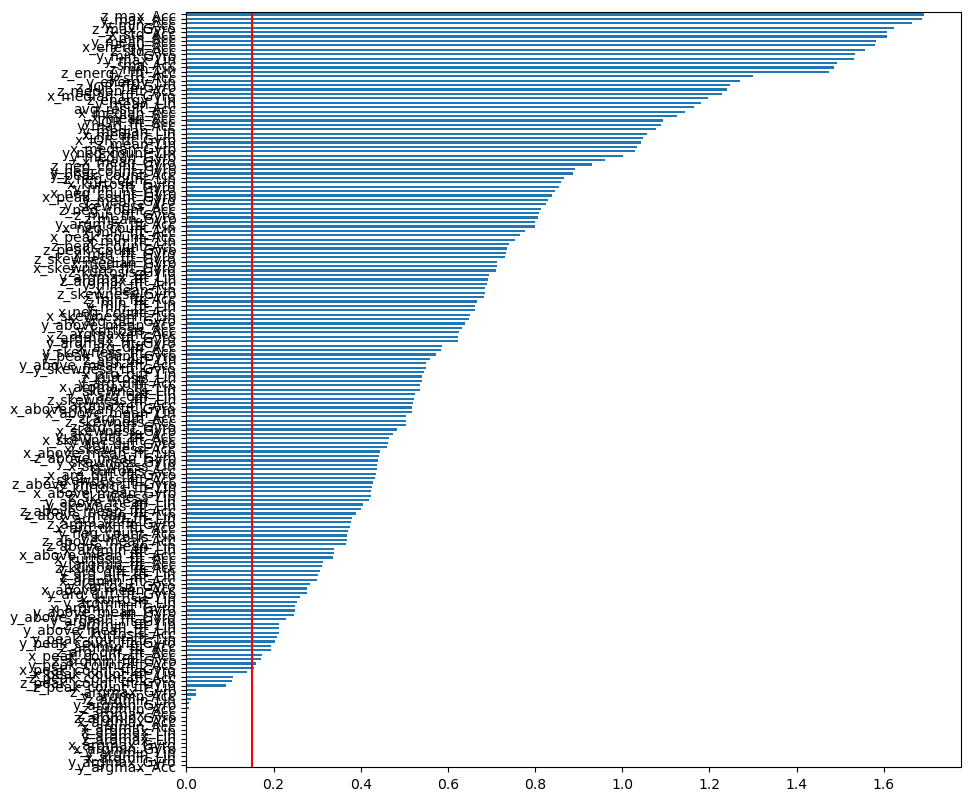

In [22]:
import matplotlib.pyplot as plt
# adjust the figure size
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=100)
mutual_info.sort_values().plot(kind='barh')
plt.axvline(x=0.15,c='r')

In [23]:
l5=[]
for i in range(len(list(mutual_info))):
    if list(mutual_info)[i]<=0.15:
        l5.append(list(X_train.columns)[i])

In [24]:
len(l5)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

22

In [25]:
X_train.drop(l5,axis=1,inplace=True)

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Fit ExtraTreesClassifier with best set of parameters
model = ExtraTreesClassifier(n_estimators=50, min_samples_split=2, min_samples_leaf=3, criterion='gini',random_state=0)
model.fit(X_train,y_train)
print("model.feature_importances_:\n")
print(model.feature_importances_)
print("\n")
print("X_train.columns:\n")
print(X_train.columns)
ranked_features = pd.Series(model.feature_importances_, index = X_train.columns)

model.feature_importances_:

[2.94990761e-02 4.07383392e-02 6.50568713e-04 2.74474226e-03
 5.47356196e-03 4.31199830e-03 3.72031527e-03 2.77327459e-03
 3.99145909e-02 2.82475589e-02 2.02520082e-02 3.51520402e-02
 2.93310028e-02 1.61977054e-02 5.44848513e-03 6.16236125e-02
 3.25709452e-02 3.12004082e-02 1.70323313e-02 1.13173918e-02
 7.97898794e-03 3.39647847e-03 8.10867262e-03 4.41546056e-03
 1.16067148e-04 2.40819722e-02 9.34540596e-03 6.30588407e-03
 5.76702115e-03 8.31799152e-03 1.26899293e-02 7.83009883e-03
 1.01863991e-02 1.36403969e-02 2.78909384e-03 1.01261454e-02
 5.70012555e-03 7.84878357e-04 3.92585687e-03 7.81389465e-03
 8.38920572e-04 4.18995570e-04 5.59417504e-03 8.13756968e-03
 1.22152228e-02 7.87310548e-03 1.33480941e-02 2.08759192e-03
 4.77076329e-03 8.86437907e-03 1.31757409e-02 2.72712456e-03
 9.57458107e-04 6.28475694e-03 9.56798356e-03 2.71100450e-03
 6.61072770e-04 5.37234762e-03 1.32896249e-03 1.69096570e-03
 3.79110548e-03 4.27022384e-04 7.10775945e-04 6.73194540

Visual Representation of Feature Importance from Model (Red line indicates value=0.005):


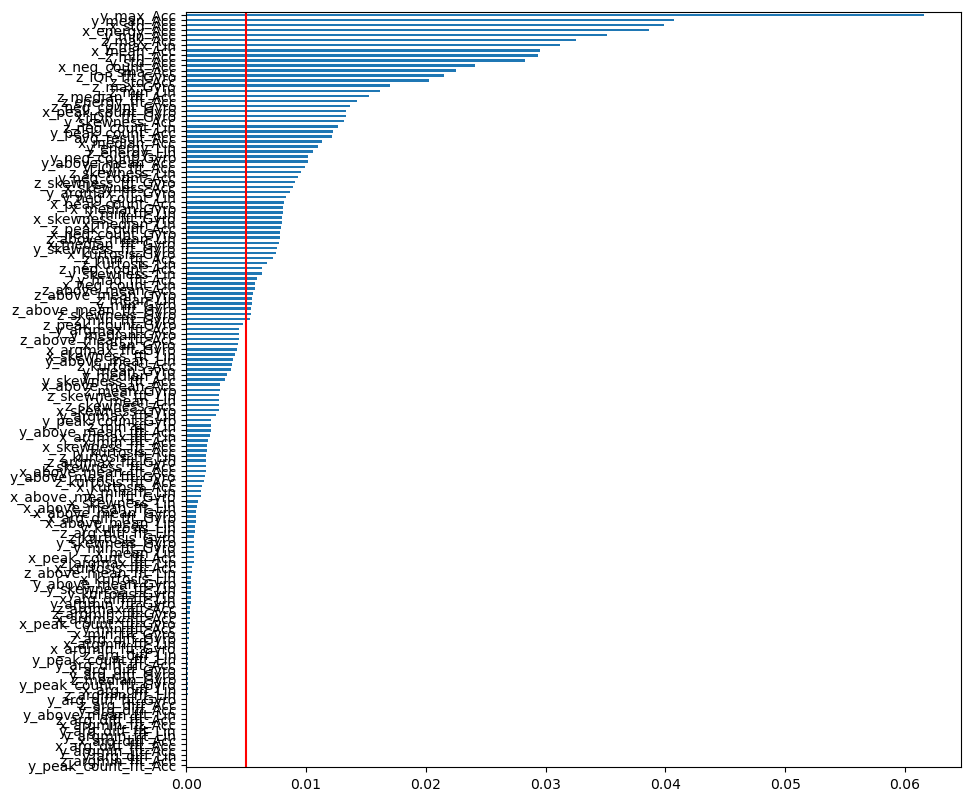

In [27]:
print("Visual Representation of Feature Importance from Model (Red line indicates value=0.005):")

## Visual Representaion
figure(figsize=(10,10), dpi=100)
ranked_features.sort_values().plot(kind='barh')
plt.axvline(x=0.005,c='r')
plt.show()

In [28]:
l6=[]
for i in range(len(list(ranked_features))):
    if list(mutual_info)[i]<=0.005:
        l6.append(list(X_train.columns)[i])

In [29]:
len(l6)

13

In [30]:
X_train.drop(l6,axis=1,inplace=True)

In [31]:
len(X_train.columns)

136

In [32]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))  ## balanced data

Class=4, n=209 (9.976%)
Class=1, n=208 (9.928%)
Class=2, n=231 (11.026%)
Class=0, n=204 (9.737%)
Class=3, n=209 (9.976%)
Class=5, n=207 (9.881%)
Class=6, n=198 (9.451%)


# Testing Data Preparation

In [33]:
X_test.drop(constant_columns, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_test.drop(l5,axis=1,inplace=True)
X_test.drop(l6,axis=1,inplace=True)

In [34]:
X_test.shape

(629, 136)

In [35]:
# all features excluded from tarining and testing
features_excluded_4= []
features_excluded_4.extend(constant_columns)
features_excluded_4.extend(corr_features)
features_excluded_4.extend(l5)
features_excluded_4.extend(l6)

In [36]:
len(features_excluded_4)

199

In [37]:
features_excluded_4

['z_mean_Acc',
 'x_max_fft_Acc',
 'z_aad_Lin',
 'y_std_Gyro',
 'z_IQR_Acc',
 'x_max_Acc',
 'y_median_fft_Acc',
 'y_IQR_fft_Lin',
 'y_std_fft_Acc',
 'y_min_Lin',
 'x_maxmin_diff_fft_Acc',
 'z_mean_fft_Gyro',
 'y_mad_Gyro',
 'x_min_Lin',
 'x_peak_count_Lin',
 'y_energy_Acc',
 'z_median_fft_Gyro',
 'y_energy_fft_Lin',
 'y_peak_count_Lin',
 'x_mad_Acc',
 'x_IQR_Gyro',
 'z_median_Lin',
 'z_maxmin_diff_fft_Acc',
 'z_max_fft_Acc',
 'x_IQR_fft_Lin',
 'x_energy_fft_Gyro',
 'y_IQR_Acc',
 'y_IQR_Gyro',
 'z_energy_fft_Gyro',
 'x_aad_fft_Gyro',
 'z_median_fft_Lin',
 'z_max_fft_Gyro',
 'y_energy_fft_Acc',
 'y_aad_Acc',
 'x_IQR_Lin',
 'avg_result_Lin',
 'y_std_Lin',
 'y_maxmin_diff_fft_Acc',
 'z_maxmin_diff_fft_Lin',
 'avg_result_Accl_fft_Lin',
 'x_max_Gyro',
 'x_mean_fft_Gyro',
 'x_std_fft_Lin',
 'y_mad_Acc',
 'x_aad_Acc',
 'x_maxmin_diff_fft_Gyro',
 'z_pos_count_Acc',
 'y_max_fft_Lin',
 'y_mean_fft_Acc',
 'x_IQR_fft_Acc',
 'x_energy_Gyro',
 'x_energy_fft_Lin',
 'x_kurtosis_fft_Gyro',
 'x_std_fft_Ac

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [39]:
# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits=10,test_size=0.30,random_state=0)

# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [40]:
# creating hyperparameter grid
c_space=np.logaspace=(-5,8,15)
params_LOG = {'C':c_space,
              'max_iter':[50,100,150,200,500,1000],
              'multi_class' : ['ovr', 'multinomial']}

# instantiating logistic regression Classifier
Randomized_search_LOG = LogisticRegression()

# instantiating RandomizedSearchCV
Randomized_search_LOG = RandomizedSearchCV(Randomized_search_LOG,params_LOG,cv=5)
Randomized_search_LOG.fit(X_train,y_train)
best_params_LOG = Randomized_search_LOG.fit(X_train,y_train)

# print tuned parameters and score
print('Tuned Logistic Regression Parameters are:{}'.format(Randomized_search_LOG.best_params_))
print('Score:{}'.format(Randomized_search_LOG.best_score_))

predictions_training_LOG = Randomized_search_LOG.predict(X_train)
predictions_testing_LOG = Randomized_search_LOG.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Logistic Regression after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_LOG),"0.2f"))
print("Testing accuracy of Logistic Regression:{}".format(accuracy_score(y_test,predictions_testing_LOG),"0.2f"))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-5)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-5)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1309, in fit
    raise ValueError("Penalty term must be positive; got (C=%r)"
ValueError: Penalty term must be positive; got (C=-5)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\

Tuned Logistic Regression Parameters are:{'multi_class': 'multinomial', 'max_iter': 50, 'C': 8}
Score:0.995221843003413
Training accuracy of Logistic Regression after Cross Validation in training portion:1.0
Testing accuracy of Logistic Regression:0.9952305246422893


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
## Confusion Matrix
cm_LOG = confusion_matrix(y_test, predictions_testing_LOG)
print("Confusion Matrix : \n", cm_LOG)

## Classification Report
print(classification_report(y_test, predictions_testing_LOG))

## probability of falling into a particular class from each observation
probs_LOG = best_params_LOG.predict_proba(X_test)
probs_LOG = probs_LOG[:,1]
probs_LOG

Confusion Matrix : 
 [[94  0  0  0  0  0  0]
 [ 0 90  1  1  0  0  0]
 [ 0  0 69  0  0  0  0]
 [ 0  0  0 91  0  0  0]
 [ 0  0  0  0 91  0  0]
 [ 0  0  0  0  0 92  1]
 [ 0  0  0  0  0  0 99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      0.98      0.99        92
           2       0.99      1.00      0.99        69
           3       0.99      1.00      0.99        91
           4       1.00      1.00      1.00        91
           5       1.00      0.99      0.99        93
           6       0.99      1.00      0.99        99

    accuracy                           1.00       629
   macro avg       0.99      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([1.51208491e-04, 1.29212535e-03, 8.70021384e-03, 4.56061714e-05,
       2.87907011e-04, 4.88211732e-04, 3.99338797e-04, 1.04981061e-02,
       9.98984648e-01, 1.24213805e-04, 8.12680344e-08, 1.11577761e-04,
       2.25746514e-04, 2.10995372e-04, 9.97082619e-01, 5.28254174e-04,
       3.79389201e-03, 9.92095104e-01, 9.51175407e-06, 8.30988838e-05,
       4.35363685e-09, 1.61433801e-04, 1.44928519e-05, 1.46104873e-05,
       9.97526733e-01, 4.14686974e-05, 2.93738450e-06, 1.41940755e-04,
       5.81145359e-04, 9.98847335e-01, 5.04459114e-05, 9.98637031e-01,
       1.52467674e-07, 4.57394327e-04, 2.93522972e-04, 2.22146741e-04,
       3.35324517e-05, 9.06667115e-05, 1.39075141e-03, 2.46791971e-05,
       9.96260622e-01, 1.50912422e-05, 1.89161225e-04, 1.02239750e-03,
       9.98582299e-01, 2.05416509e-07, 2.55647271e-08, 8.82831455e-05,
       6.77043323e-08, 1.15453500e-03, 6.92423328e-05, 1.31703778e-04,
       4.03677650e-05, 9.97719112e-01, 3.28903625e-05, 1.52788153e-03,
      

In [42]:
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=2,random_state=0)
#n_scores=cross_val_score(classifier,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
#n_scores.mean()

# SVM

In [43]:
# import library for RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import library to calculate cross validation score
from sklearn.model_selection import cross_val_score

In [44]:
# import library for Support Vector Machine
from sklearn.svm import SVC

# We'll also check cross validation score from training set
# Import library for Repeated Random Cross Validation
#from sklearn.model_selection import ShuffleSplit
#ssplit = ShuffleSplit(n_splits=10,test_size=0.30)

# import library for DecisionTree
from sklearn.svm import SVC

# make parameter Randomized for Support Vector Machine
params_SVM = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear','poly','rbf']
}
print('Parameters to check are:\n',params_SVM)

# fitting Randomized_search on RandomizedForestClassifier and getting the best hyperparameters
Randomized_search_SVM = RandomizedSearchCV(SVC(probability=True, random_state=0), params_SVM, verbose=1, cv=5)
Randomized_search_SVM.fit(X_train, y_train)
best_params_SVM = Randomized_search_SVM.fit(X_train, y_train)

# print tuned parameters and score
print('Tuned SVC Parameters are:{}'.format(Randomized_search_SVM.best_params_))
print('Score:{}'.format(Randomized_search_SVM.best_score_))  # Mean cross-validated score of the best_estimator
predictions_training_SVM = Randomized_search_SVM.predict(X_train)
predictions_testing_SVM = Randomized_search_SVM.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Training accuracy of Support Vector Machine after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
print("Testing accuracy of Support Vector Machine:{}".format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

Parameters to check are:
 {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'poly', 'rbf']}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned SVC Parameters are:{'kernel': 'poly', 'gamma': 1, 'C': 1}
Score:0.9972719463211905
Training accuracy of Support Vector Machine after Cross Validation in training portion:1.0
Testing accuracy of Support Vector Machine:0.9968203497615262


In [45]:
## Confusion Matrix
cm_SVM = confusion_matrix(y_test, predictions_testing_SVM)
print("Confusion Matrix : \n", cm_SVM)

## Classification Report
print(classification_report(y_test, predictions_testing_SVM))

## probability of falling into a particular class from each observation
probs_SVM = best_params_SVM.predict_proba(X_test)
probs_SVM = probs_SVM[:,1]
probs_SVM 

Confusion Matrix : 
 [[94  0  0  0  0  0  0]
 [ 0 91  0  0  0  0  1]
 [ 0  0 69  0  0  0  0]
 [ 0  0  0 91  0  0  0]
 [ 0  0  0  0 91  0  0]
 [ 0  0  0  0  0 92  1]
 [ 0  0  0  0  0  0 99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      0.99      0.99        92
           2       1.00      1.00      1.00        69
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       1.00      0.99      0.99        93
           6       0.98      1.00      0.99        99

    accuracy                           1.00       629
   macro avg       1.00      1.00      1.00       629
weighted avg       1.00      1.00      1.00       629



array([2.06095898e-03, 2.24355217e-03, 1.12790148e-02, 2.51399318e-03,
       2.66789791e-03, 1.29125179e-03, 1.01873324e-03, 7.44049478e-03,
       9.88596613e-01, 1.75979894e-03, 3.53337304e-04, 6.89698103e-04,
       9.22374093e-04, 1.86655376e-03, 9.86531499e-01, 2.32247095e-03,
       1.08535760e-02, 9.73174405e-01, 1.63762540e-03, 5.16465529e-04,
       1.72133293e-04, 1.52718801e-03, 1.01625372e-03, 6.70649588e-04,
       9.89589910e-01, 3.15976390e-03, 5.65540963e-04, 1.43233130e-03,
       1.29455109e-03, 9.87862468e-01, 8.90011205e-04, 9.88525089e-01,
       8.53306890e-04, 9.60219238e-04, 1.59209816e-03, 1.74755015e-03,
       1.16646871e-03, 2.34384794e-03, 3.06028178e-03, 8.56119772e-04,
       9.83938349e-01, 1.82805812e-03, 7.62172366e-04, 3.79280625e-03,
       9.88438226e-01, 1.12270754e-03, 6.60184410e-04, 4.32427131e-03,
       4.45930456e-04, 1.64970566e-03, 6.17294664e-04, 4.90087098e-03,
       1.17183544e-03, 9.85530982e-01, 1.30858773e-03, 3.04309114e-03,
      

In [46]:
#Randomized_search_SVM.cv_results_

In [47]:
#score=cross_val_score(SVC(C=1000, gamma=0.1, probability=True, random_state=0),X_train_new, y_train, cv=ssplit)
#score=cross_val_score(SVC(C=1000, gamma=0.001, probability=True, random_state=0),X_train, y_train, cv=ssplit)
#predictions_training_SVM_CV=score.mean()     
#predictions_testing_SVM = Randomized_search_SVM.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_SVM),"0.2f"))
#print("Training accuracy of Support Vector Machine after Cross Validation in training portion: ", format(predictions_training_SVM_CV,"0.2f"))
#print("Testing accuracy of Support Vector Machine: ", format(accuracy_score(y_test,predictions_testing_SVM),"0.2f"))

# Random Forest

In [48]:
# import library for RandomForest
from sklearn.ensemble import RandomForestClassifier

In [49]:
# make parameter Randomized for DecisionTree
params_RFC = {
    'criterion': ['entropy','gini'],
    
    'max_depth': [int(x) for x in np.linspace(10,100,5)],
    
    'max_features': ['auto','sqrt','log2'],
    
    'min_samples_leaf': [2,5,8],
    
    'min_samples_split': [2,5,10],
    
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)]
}
print('Parameters to check are:\n',params_RFC)

# fitting Randomized_search on RandomForestClassifier and getting the best hyperparameters
Randomized_search_RFC = RandomizedSearchCV(RandomForestClassifier(random_state=0), params_RFC, verbose=1, cv=5)
Randomized_search_RFC.fit(X_train, y_train)
best_params_RFC = Randomized_search_RFC.fit(X_train, y_train)

# print tuned parameters and score
print('Tuned SVC Parameters are:{}'.format(Randomized_search_RFC.best_params_))
print('Score:{}'.format(Randomized_search_RFC.best_score_))  # Mean cross-validated score of the best_estimator
predictions_training_RFC = Randomized_search_RFC.predict(X_train)
predictions_testing_RFC = Randomized_search_RFC.predict(X_test)


#print("Training accuracy of Support Vector Machine: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Training accuracy of Random Forest Classifier after Cross Validation in training portion:{}".format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
print("Testing accuracy of Random Forest Classifier:{}".format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

Parameters to check are:
 {'criterion': ['entropy', 'gini'], 'max_depth': [10, 32, 55, 77, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [2, 5, 8], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 200, 300, 400, 500]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Tuned SVC Parameters are:{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 32, 'criterion': 'entropy'}
Score:0.9931787049290707
Training accuracy of Random Forest Classifier after Cross Validation in training portion:1.0
Testing accuracy of Random Forest Classifier:0.9920508744038156


In [50]:
## Confusion Matrix
cm_RFC = confusion_matrix(y_test, predictions_testing_RFC)
print("Confusion Matrix : \n", cm_RFC)

## Classification Report
print(classification_report(y_test, predictions_testing_RFC))

## probability of falling into a particular class from each observation
probs_RFC = best_params_RFC.predict_proba(X_test)
probs_RFC = probs_RFC[:,1]
probs_RFC

Confusion Matrix : 
 [[92  0  0  0  0  1  1]
 [ 0 90  1  0  0  1  0]
 [ 0  0 69  0  0  0  0]
 [ 0  0  0 91  0  0  0]
 [ 0  0  0  0 91  0  0]
 [ 0  0  0  0  0 92  1]
 [ 0  0  0  0  0  0 99]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        94
           1       1.00      0.98      0.99        92
           2       0.99      1.00      0.99        69
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        91
           5       0.98      0.99      0.98        93
           6       0.98      1.00      0.99        99

    accuracy                           0.99       629
   macro avg       0.99      0.99      0.99       629
weighted avg       0.99      0.99      0.99       629



array([0.00000000e+00, 3.50000000e-03, 3.75000000e-03, 1.25000000e-03,
       3.33333333e-03, 2.63888889e-03, 8.33333333e-04, 1.25416667e-02,
       9.89833333e-01, 0.00000000e+00, 0.00000000e+00, 1.66666667e-03,
       1.66666667e-03, 0.00000000e+00, 9.93333333e-01, 0.00000000e+00,
       2.02083333e-02, 9.52986111e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.96428571e-03, 0.00000000e+00, 6.25000000e-04,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.50000000e-03,
       5.00000000e-04, 9.94722222e-01, 0.00000000e+00, 8.87500000e-01,
       0.00000000e+00, 0.00000000e+00, 4.75000000e-03, 0.00000000e+00,
       1.20654762e-02, 3.20833333e-03, 7.42857143e-03, 0.00000000e+00,
       9.59583333e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.95250000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.33333333e-03, 1.87500000e-03, 0.00000000e+00,
       5.83333333e-03, 9.94583333e-01, 1.25000000e-03, 3.33333333e-03,
      

In [51]:
#score=cross_val_score(RandomForestClassifier(......),X_train, y_train, cv=ssplit)
#predictions_training_RFC_CV=score.mean()
#predictions_testing_RFC = Randomized_search_RFC.predict(X_test)

#print("Training accuracy of Random Forest Classifier: ", format(accuracy_score(y_train,predictions_training_RFC),"0.2f"))
#print("Training accuracy of Random Forest Classifier after Cross Validation: ", format(predictions_training_RFC_CV,"0.2f"))
#print("Testing accuracy of Random Forest Classifier: ", format(accuracy_score(y_test,predictions_testing_RFC),"0.2f"))

In [52]:
## AUC (Area Under Curve) Score
#auc_score_RFC = roc_auc_score(y_test, probs_RFC)
#print("Random Forest Classifier ROC AUC = ",format(auc_score_RFC,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')


## ROC Curve from Random Forest
#fpr_RFC, tpr_RFC, __RFC = roc_curve(y_test, probs_RFC)
#plt.plot(fpr_RFC, tpr_RFC, linestyle='--', label='Random Forest')
#plt.title("ROC Curve for Random Forest Classifier")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()

In [53]:
## AUC (Area Under Curve) Score
#auc_score_SVM = roc_auc_score(y_test, probs_SVM)
#print("Support Vector Machine ROC AUC = ",format(auc_score_SVM,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
#fpr_SVM, tpr_SVM, __SVM = roc_curve(y_test, probs_SVM)
#plt.plot(fpr_SVM, tpr_SVM, linestyle='--', label='Support Vector Machine')
#plt.title("ROC Curve for Support Vector Machine")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()

In [54]:
## AUC (Area Under Curve) Score
#auc_score_LOG = roc_auc_score(y_test, probs_LOG)
#print("Support Vector Machine ROC AUC = ",format(auc_score_LOG,"0.2f"))

## no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test))]
#ns_auc = roc_auc_score(y_test, ns_probs)
#ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
#plt.plot(ns_fpr, ns_tpr, marker='.', label='No Skill Model')

## ROC Curve of Support Vector Machine
#fpr_LOG, tpr_LOG, __LOG = roc_curve(y_test, probs_LOG)
#plt.plot(fpr_LOG, tpr_LOG, linestyle='--', label='Support Vector Machine')
#plt.title("ROC Curve for Support Vector Machine")

# axis labels
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show legend
#plt.legend()
# show the plot
#plt.show()